<a href="https://colab.research.google.com/github/subro12/Assignments/blob/master/Assignment_DT_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

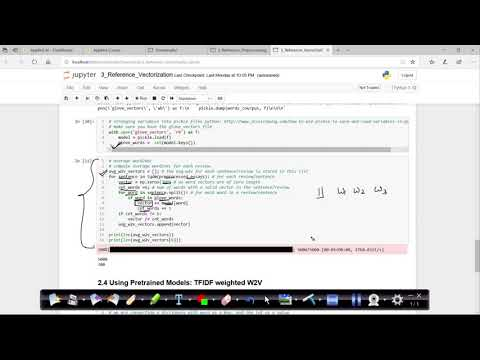

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pickle
#please use below code to load glove vectors 
with open('/content/gdrive/My Drive/9_Donors_choose_DT/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

In [3]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer



sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


<h1>1. Decision Tree </h1>

## 1.1 Loading Data

In [6]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

from sklearn.tree import DecisionTreeClassifier
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [7]:
data = pd.read_csv('/content/gdrive/My Drive/9_Donors_choose_DT/preprocessed_data.csv')

In [8]:
data.head(n=2)

school_state  ...   price
0           ca  ...  725.05
1           ut  ...  213.03

[2 rows x 9 columns]

In [9]:
data.shape

(109248, 9)

In [10]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [11]:
y = data['project_is_approved'].values
x = data.drop(['project_is_approved'],axis=1)
# x.head(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y) #splitting data into train and test, using stratified sampling of y values.

In [12]:
x.head(1)

school_state  ...   price
0           ca  ...  725.05

[1 rows x 8 columns]

In [13]:
def categoryVarfit(data):
    vectorizer = CountVectorizer()
    vectorizer.fit(data)
    return vectorizer
  
def categoryvartransform(vectorizer, data):
    var_ohe = vectorizer.transform(data)
    # print(vectorizer.get_feature_names())
    print("shape of data after vectorization:",var_ohe.shape)
    return  var_ohe


def essayfitBOW(data):
    vectorizer = CountVectorizer(min_df=10)
    vectorizer.fit(data)
    return vectorizer

def essayfitTfIdf(data):
    vectorizer = TfidfVectorizer(min_df=10)
    vectorizer.fit(data)
    return vectorizer

def numericalvarfit(data):
    normalizer = Normalizer()
    normalizer.fit(data)
    return normalizer

def numericalvartransform(normalizer,data):
    normal_values = normalizer.transform(data)
    print("Shape of data after normalization:",normal_values.shape)
    return normal_values

Vectorizing the columns

##### Categorical Features

###### School_state

In [14]:
print("Original x_train shape:",x_train.shape)
school_state_vector = categoryVarfit(x_train['school_state'].values)
x_train_school_state_ohe = categoryvartransform(school_state_vector,x_train['school_state'].values)
x_test_school_state_ohe = categoryvartransform(school_state_vector,x_test['school_state'].values)

Original x_train shape: (73196, 8)
shape of data after vectorization: (73196, 51)
shape of data after vectorization: (36052, 51)


###### Teacher_prefix


In [15]:
print("Original x_train shape:",x_train.shape)
teacher_prefix_vector = categoryVarfit(x_train['teacher_prefix'].values)
x_train_teacher_prefix_ohe = categoryvartransform(teacher_prefix_vector,x_train['teacher_prefix'].values)
x_test_teacher_prefix_ohe = categoryvartransform(teacher_prefix_vector,x_test['teacher_prefix'].values)

Original x_train shape: (73196, 8)
shape of data after vectorization: (73196, 5)
shape of data after vectorization: (36052, 5)


project_Grade_category

In [16]:
print("Original x_train shape:",x_train.shape)
project_grade_category_vector = categoryVarfit(x_train['project_grade_category'].values)
x_train_project_grade_category_ohe = categoryvartransform(project_grade_category_vector,x_train['project_grade_category'].values)
x_test_project_grade_category_ohe = categoryvartransform(project_grade_category_vector,x_test['project_grade_category'].values)

Original x_train shape: (73196, 8)
shape of data after vectorization: (73196, 4)
shape of data after vectorization: (36052, 4)


###### Clean categories

In [17]:
print("Original x_train shape:",x_train.shape)
clean_categories_vector = categoryVarfit(x_train['clean_categories'].values)
x_train_clean_categories_ohe = categoryvartransform(clean_categories_vector,x_train['clean_categories'].values)
x_test_clean_categories_ohe = categoryvartransform(clean_categories_vector,x_test['clean_categories'].values)

Original x_train shape: (73196, 8)
shape of data after vectorization: (73196, 9)
shape of data after vectorization: (36052, 9)


###### Clean Sub categories

In [18]:
print("Original x_train shape:",x_train.shape)
clean_subcategories_vector = categoryVarfit(x_train['clean_subcategories'].values)
x_train_clean_subcategories_ohe = categoryvartransform(clean_subcategories_vector,x_train['clean_subcategories'].values)
x_test_clean_subcategories_ohe = categoryvartransform(clean_subcategories_vector,x_test['clean_subcategories'].values)

Original x_train shape: (73196, 8)
shape of data after vectorization: (73196, 30)
shape of data after vectorization: (36052, 30)


###### Essay

In [19]:
print("Original x_train shape:",x_train.shape)
essay_vector_tfidf = essayfitTfIdf(x_train['essay'].values)
x_train_essay_tfidf = categoryvartransform(essay_vector_tfidf,x_train['essay'].values)
x_test_essay_tfidf = categoryvartransform(essay_vector_tfidf,x_test['essay'].values)

Original x_train shape: (73196, 8)
shape of data after vectorization: (73196, 14201)
shape of data after vectorization: (36052, 14201)


Numerical Features

###### teacher_number_of_previously_posted_projects


In [20]:
print("Original x_train shape:",x_train.shape)
teacher_number_of_previously_posted_projects_vector = numericalvarfit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_train_teacher_number_of_previously_posted_projects_norm = numericalvartransform(teacher_number_of_previously_posted_projects_vector,x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
x_test_teacher_number_of_previously_posted_projects_norm = numericalvartransform(teacher_number_of_previously_posted_projects_vector,x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

Original x_train shape: (73196, 8)
Shape of data after normalization: (1, 73196)
Shape of data after normalization: (1, 36052)


###### price

In [21]:
print("Original x_train shape:",x_train.shape)
price_vector = numericalvarfit(x_train['price'].values.reshape(1,-1))
x_train_price_norm = numericalvartransform(price_vector,x_train['price'].values.reshape(1,-1))
x_test_price_norm = numericalvartransform(price_vector,x_test['price'].values.reshape(1,-1))

Original x_train shape: (73196, 8)
Shape of data after normalization: (1, 73196)
Shape of data after normalization: (1, 36052)


In [22]:
x_train_polarity_scores = x_train['essay'].apply(sid.polarity_scores)
x_test_polarity_scores = x_test['essay'].apply(sid.polarity_scores)

In [23]:
x_train_neg, x_train_neu, x_train_pos, x_train_compound = [],[],[],[]
x_test_neg, x_test_neu, x_test_pos, x_test_compound = [],[],[],[]
for i in x_train_polarity_scores.index:
  x_train_neg.append(x_train_polarity_scores[i]['neg'])
  x_train_neu.append(x_train_polarity_scores[i]['neu'])
  x_train_pos.append(x_train_polarity_scores[i]['pos'])
  x_train_compound.append(x_train_polarity_scores[i]['compound'])

for j in x_test_polarity_scores.index:
  x_test_neg.append(x_test_polarity_scores[j]['neg'])
  x_test_neu.append(x_test_polarity_scores[j]['neu'])
  x_test_pos.append(x_test_polarity_scores[j]['pos'])
  x_test_compound.append(x_test_polarity_scores[j]['compound'])

In [24]:
# merging all sparce matrices
from scipy.sparse import hstack
x_tr = hstack((x_train_school_state_ohe
               ,x_train_teacher_prefix_ohe
               ,x_train_project_grade_category_ohe
               ,x_train_clean_categories_ohe
               ,x_train_clean_subcategories_ohe
               ,x_train_essay_tfidf
               ,x_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
               ,x_train_price_norm.reshape(-1,1)
               ,np.array(x_train_neg).reshape(-1,1)
               ,np.array(x_train_neu).reshape(-1,1)
               ,np.array(x_train_pos).reshape(-1,1)
               ,np.array(x_train_compound).reshape(-1,1)
               )).tocsr()
x_te = hstack((x_test_school_state_ohe
               ,x_test_teacher_prefix_ohe
               ,x_test_project_grade_category_ohe
               ,x_test_clean_categories_ohe
               ,x_test_clean_subcategories_ohe
               ,x_test_essay_tfidf
               ,x_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
               ,x_test_price_norm.reshape(-1,1)
               ,np.array(x_test_neg).reshape(-1,1)
               ,np.array(x_test_neu).reshape(-1,1)
               ,np.array(x_test_pos).reshape(-1,1)
               ,np.array(x_test_compound).reshape(-1,1)
               )).tocsr()

print("Final Data Matrix")
print("x_tr.shape",x_tr.shape)
print("y_tr.shape",y_train.shape)
print("x_test.shape",x_te.shape)
print("y_test.shape",y_test.shape)

Final Data Matrix
x_tr.shape (73196, 14306)
y_tr.shape (73196,)
x_test.shape (36052, 14306)
y_test.shape (36052,)


In [25]:
def gridsearch(x_tr,y_train):
    parameters = {'min_samples_split':[5, 10, 100, 500]
                  ,'max_depth':[1, 5, 10, 50]
                  }
    dt = DecisionTreeClassifier(random_state=0)
    clf = GridSearchCV(dt, parameters, cv=5, scoring='roc_auc', return_train_score=True)

    clf.fit(x_tr,y_train)

    train_auc = clf.cv_results_['mean_train_score']
    train_auc_std = clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score']
    cv_auc_std = clf.cv_results_['std_test_score']

    return clf

In [26]:
clf_set1 = gridsearch(x_tr,y_train)

In [27]:
clf_set1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [28]:
clf_set1.cv_results_['mean_test_score']

array([0.55195102, 0.55195102, 0.55195102, 0.55195102, 0.62871335,
       0.62887757, 0.62881963, 0.62893219, 0.64165714, 0.64149812,
       0.64462536, 0.64634583, 0.53891553, 0.54509152, 0.57502138,
       0.61363587])

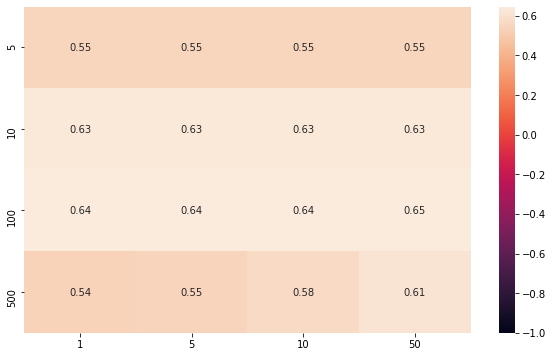

In [29]:
df = pd.DataFrame(np.array(clf_set1.cv_results_['mean_test_score']).reshape(-1,4))
df.index=['5','10','100','500']
df.columns=['1','5','10','50']
# mask = np.triu(np.ones_like(df,dtype=np.bool))

plt.figure(figsize=(10,6))
ax = sns.heatmap(df,vmin=-1,annot=True
                #  ,mask=mask
                 )

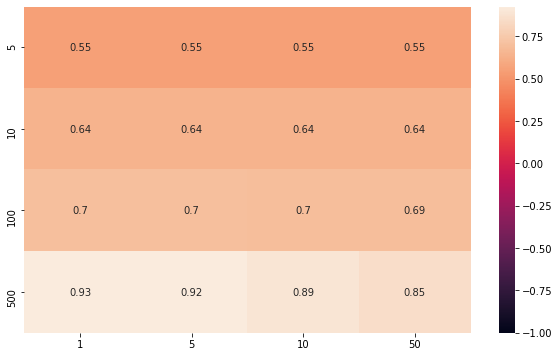

In [30]:
df = pd.DataFrame(np.array(clf_set1.cv_results_['mean_train_score']).reshape(-1,4))
df.index=['5','10','100','500']
df.columns=['1','5','10','50']
# mask = np.triu(np.ones_like(df,dtype=np.bool))

plt.figure(figsize=(10,6))
ax = sns.heatmap(df,vmin=-1,annot=True
                #  ,mask=mask
                 )

In [31]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [32]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [33]:
clf_set1.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [73]:
dt_set1 = DecisionTreeClassifier(random_state=0,max_depth=clf_set1.best_params_['max_depth'],min_samples_split=clf_set1.best_params_['min_samples_split'])
dt_set1.fit(x_tr,y_train)

y_train_pred = batch_predict(clf_set1,x_tr)
y_test_pred = batch_predict(clf_set1,x_te)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train,y_train_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,y_test_pred)

plt.plot(fpr_train, tpr_train, label="AUC Train")
plt.plot(fpr_test, tpr_test, label="AUC Test")
plt.legend()
plt.xlabel("FPR values")
plt.ylabel("TPR values")
plt.title("AUC curves")
plt.grid()
plt.show()

ValueError: ignored

In [35]:
# AUC values for train and test
clf_set1_train_auc = auc(fpr_train,tpr_train)
clf_set1_test_auc = auc(fpr_test,tpr_test)
print("AUC of train-->",clf_set1_train_auc)
print("AUC of test-->",clf_set1_test_auc)

AUC of train--> 0.693475288529115
AUC of test--> 0.6456193588842377


In [36]:
best_threshold = find_best_threshold(thresholds_train,fpr_train,tpr_train)
print("best_threshold-->",best_threshold)

the maximum value of tpr*(1-fpr) 0.41617658719094686 for threshold 0.866
best_threshold--> 0.8657718120805369


In [37]:
# confusion_matrix
print("Confusion matrix for training dataset")
print(confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_threshold)))
print("Confusion matrix for test dataset")
print(confusion_matrix(y_test,predict_with_best_t(y_test_pred, best_threshold)))

Confusion matrix for training dataset
[[ 6904  4179]
 [20616 41497]]
Confusion matrix for test dataset
[[ 3212  2247]
 [11139 19454]]


In [38]:
y_test_pred_clf=predict_with_best_t(y_test_pred,best_threshold)

In [39]:
x_test['op']=y_test
x_test['op_pred']=y_test_pred_clf
false_positive_data = x_test[(x_test['op']==0) & (x_test['op_pred']==1)]

###### WordCloud

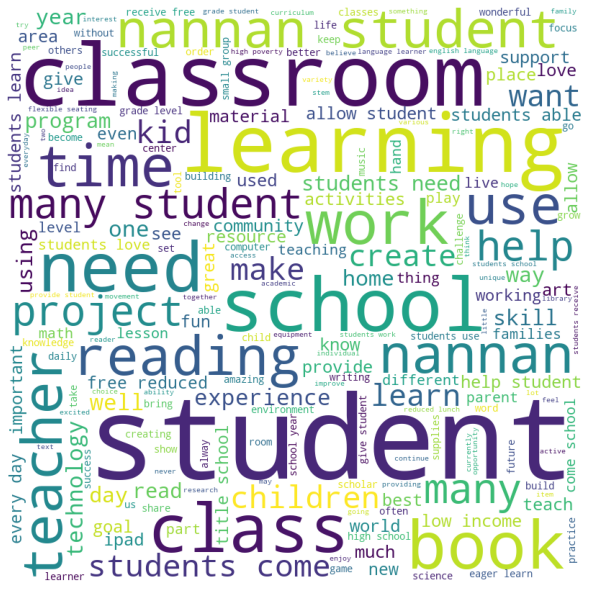

In [40]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in false_positive_data['essay']:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=stopwords, min_font_size=10).generate(comment_words)

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

###### boxplot of price

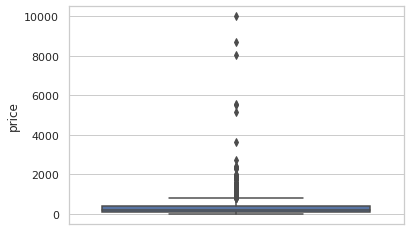

In [41]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=false_positive_data['price'])

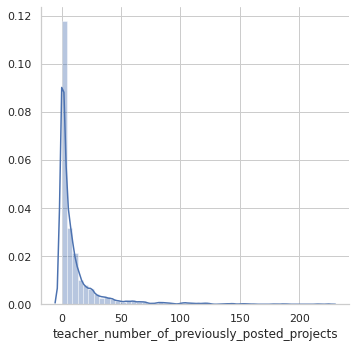

In [42]:
sns.FacetGrid(false_positive_data,size=5) \
    .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
    .add_legend()
plt.show()

# <font color='red'><b> Set2</b></font>

In [43]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 73196/73196 [00:18<00:00, 3905.22it/s]

73196
300


In [48]:
tfidf_model_train = TfidfVectorizer()
tfidf_model_train.fit(x_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_train = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_train = set(tfidf_model.get_feature_names())

In [49]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_train):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_train[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|██████████| 73196/73196 [02:09<00:00, 565.78it/s]

73196
300


In [50]:
tfidf_model_test = TfidfVectorizer()
tfidf_model_test.fit(x_test['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_test = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_test = set(tfidf_model.get_feature_names())

In [51]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_train):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_test[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))

100%|██████████| 36052/36052 [01:04<00:00, 561.95it/s]

36052
300


In [52]:
# merging all sparce matrices
from scipy.sparse import hstack
x_tr_set2 = hstack((x_train_school_state_ohe
               ,x_train_teacher_prefix_ohe
               ,x_train_project_grade_category_ohe
               ,x_train_clean_categories_ohe
               ,x_train_clean_subcategories_ohe
               ,tfidf_w2v_vectors_train
               ,x_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
               ,x_train_price_norm.reshape(-1,1)
               ,np.array(x_train_neg).reshape(-1,1)
               ,np.array(x_train_neu).reshape(-1,1)
               ,np.array(x_train_pos).reshape(-1,1)
               ,np.array(x_train_compound).reshape(-1,1)
               )).tocsr()
x_te_set2 = hstack((x_test_school_state_ohe
               ,x_test_teacher_prefix_ohe
               ,x_test_project_grade_category_ohe
               ,x_test_clean_categories_ohe
               ,x_test_clean_subcategories_ohe
               ,tfidf_w2v_vectors_test
               ,x_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
               ,x_test_price_norm.reshape(-1,1)
               ,np.array(x_test_neg).reshape(-1,1)
               ,np.array(x_test_neu).reshape(-1,1)
               ,np.array(x_test_pos).reshape(-1,1)
               ,np.array(x_test_compound).reshape(-1,1)
               )).tocsr()

print("Final Data Matrix")
print("x_tr.shape",x_tr.shape)
print("y_tr.shape",y_train.shape)
print("x_test.shape",x_te.shape)
print("y_test.shape",y_test.shape)

Final Data Matrix
x_tr.shape (73196, 405)
y_tr.shape (73196,)
x_test.shape (36052, 405)
y_test.shape (36052,)


In [57]:
def gridsearch(x_tr,y_train):
    parameters = {'min_samples_split':[5, 10, 100, 500]
                  ,'max_depth':[1, 5, 10, 50]
                  }
    dt = DecisionTreeClassifier(random_state=0)
    clf = GridSearchCV(dt, parameters, cv=5, scoring='roc_auc', return_train_score=True)

    clf.fit(x_tr,y_train)

    train_auc = clf.cv_results_['mean_train_score']
    train_auc_std = clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score']
    cv_auc_std = clf.cv_results_['std_test_score']

    return clf

In [58]:
clf_set2 = gridsearch(x_tr_set2,y_train)

In [59]:
clf_set2.best_params_

{'max_depth': 10, 'min_samples_split': 500}

In [60]:
clf_set2.cv_results_['mean_test_score']

array([0.56190904, 0.56190904, 0.56190904, 0.56190904, 0.63179035,
       0.63175818, 0.63174153, 0.63174465, 0.61284229, 0.61431613,
       0.62336623, 0.62983179, 0.53257747, 0.5342085 , 0.57787609,
       0.61600418])

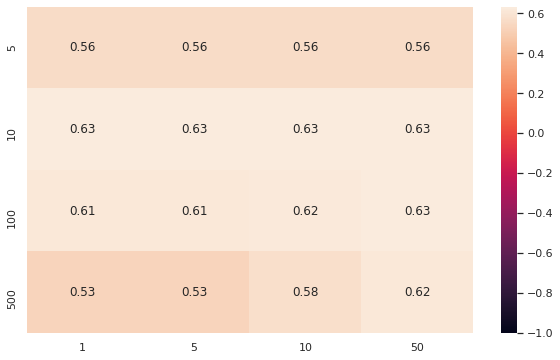

In [61]:
df = pd.DataFrame(np.array(clf_set2.cv_results_['mean_test_score']).reshape(-1,4))
df.index=['5','10','100','500']
df.columns=['1','5','10','50']
# mask = np.triu(np.ones_like(df,dtype=np.bool))

plt.figure(figsize=(10,6))
ax = sns.heatmap(df,vmin=-1,annot=True
                #  ,mask=mask
                 )

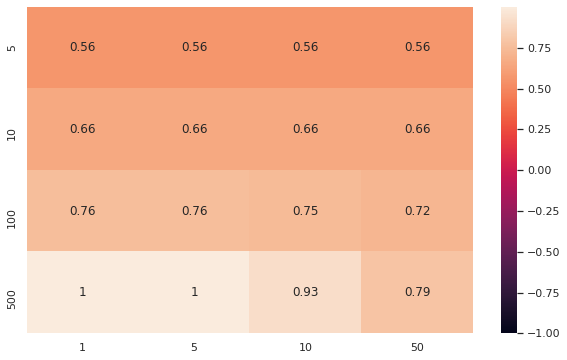

In [62]:
df = pd.DataFrame(np.array(clf_set2.cv_results_['mean_train_score']).reshape(-1,4))
df.index=['5','10','100','500']
df.columns=['1','5','10','50']
# mask = np.triu(np.ones_like(df,dtype=np.bool))

plt.figure(figsize=(10,6))
ax = sns.heatmap(df,vmin=-1,annot=True
                #  ,mask=mask
                 )

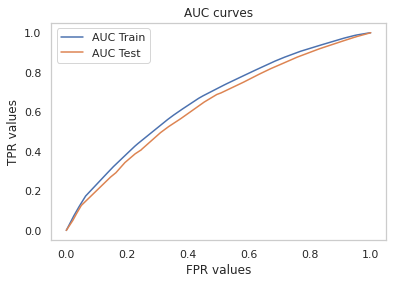

In [63]:
dt = DecisionTreeClassifier(random_state=0,max_depth=clf_set2.best_params_['max_depth'],min_samples_split=clf_set2.best_params_['min_samples_split'])
dt.fit(x_tr,y_train)

y_train_pred = batch_predict(clf_set2,x_tr)
y_test_pred = batch_predict(clf_set2,x_te)

fpr_train, tpr_train, thresholds_train = roc_curve(y_train,y_train_pred)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test,y_test_pred)

plt.plot(fpr_train, tpr_train, label="AUC Train")
plt.plot(fpr_test, tpr_test, label="AUC Test")
plt.legend()
plt.xlabel("FPR values")
plt.ylabel("TPR values")
plt.title("AUC curves")
plt.grid()
plt.show()

In [64]:
# AUC values for train and test
clf_set2_train_auc = auc(fpr_train,tpr_train)
clf_set2_test_auc = auc(fpr_test,tpr_test)
print("AUC of train-->",clf_set2_train_auc)
print("AUC of test-->",clf_set2_test_auc)

AUC of train--> 0.6574355058148679
AUC of test--> 0.629178081419933


In [65]:
best_threshold = find_best_threshold(thresholds_train,fpr_train,tpr_train)
print("best_threshold-->",best_threshold)

the maximum value of tpr*(1-fpr) 0.37979578101243605 for threshold 0.856
best_threshold--> 0.8559688581314879


In [66]:
# confusion_matrix
print("Confusion matrix for training dataset")
print(confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_threshold)))
print("Confusion matrix for test dataset")
print(confusion_matrix(y_test,predict_with_best_t(y_test_pred, best_threshold)))

Confusion matrix for training dataset
[[ 6850  4233]
 [23945 38168]]
Confusion matrix for test dataset
[[ 3405  2054]
 [13290 17303]]


In [67]:
y_test_pred_clf=predict_with_best_t(y_test_pred,best_threshold)

In [68]:
x_test['op']=y_test
x_test['op_pred']=y_test_pred_clf
false_positive_data = x_test[(x_test['op']==0) & (x_test['op_pred']==1)]

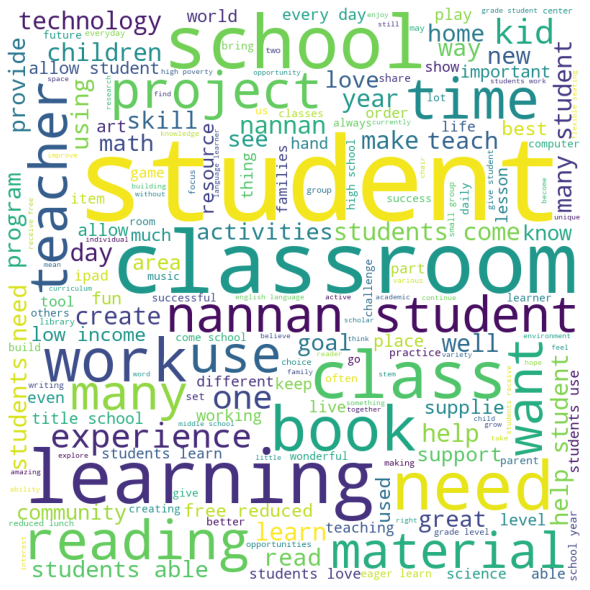

In [69]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in false_positive_data['essay']:
  val = str(val)
  tokens = val.split()
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=stopwords, min_font_size=10).generate(comment_words)

plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

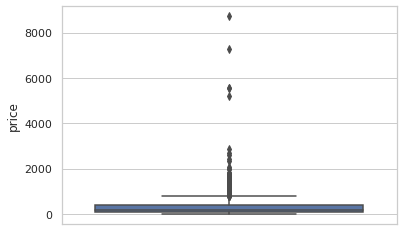

In [70]:
sns.set(style="whitegrid")
ax = sns.boxplot(y=false_positive_data['price'])

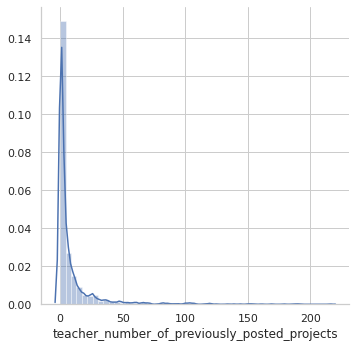

In [71]:
sns.FacetGrid(false_positive_data,size=5) \
    .map(sns.distplot, "teacher_number_of_previously_posted_projects") \
    .add_legend()
plt.show()

In [72]:
clf_set1.feature_importances_

AttributeError: ignored

# Appendix


In [ ]:
for j,i in enumerate(dir(clf_set1)):
  s="clf_set1."+i
  print(eval(s))
  print(str(j)+"="*40)

frozenset()
0========================================
<class 'sklearn.model_selection._search.GridSearchCV'>
1========================================
<method-wrapper '__delattr__' of GridSearchCV object at 0x7f154972c7b8>
2========================================
{'scoring': 'roc_auc', 'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best'), 'n_jobs': None, 'iid': 'deprecated', 'refit': True, 'cv': 5, 'verbose': 0, 'pre_dispatch': '2*n_jobs', 'error_score': nan, 'return_train_score': True, 'param_grid': {'min_samples_split': [5, 10, 100, 500], 'max_depth': [1, 5, 10, 50]}, 'multimetric_': False, 'best_index_': 

AttributeError: ignored

In [ ]:
x1 = [1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 10, 10, 50, 50, 50, 50,]
y1 = [1, 5, 10, 50, 1, 5, 10, 50, 1, 5, 10, 50, 1, 5, 10, 50,]
z1 = clf_set1.cv_results_['mean_test_score']

x2 = [1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 10, 10, 50, 50, 50, 50,]
y2 = [1, 5, 10, 50, 1, 5, 10, 50, 1, 5, 10, 50, 1, 5, 10, 50,]
z2 = clf_set1.cv_results_['mean_train_score']
    

# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=x1,y=y1,z=z1, name = 'train')
trace2 = go.Scatter3d(x=x2,y=y2,z=z2, name = 'Cross validation')
data = [trace1, trace2]

layout = go.Layout(scene = dict(
    xaxis = dict(title='n_estimators'),
    yaxis = dict(title='max_depth'),
    zaxis = dict(title='AUC'),))

fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')





In [ ]:
heatmap_set1_1 = pd.DataFrame(columns=['a','b','c','d'])
print(heatmap_set1_1)
for i in [1, 5, 10, 50]:
  for j in [5, 10, 100, 500]:
    print()

Empty DataFrame
Columns: [a, b, c, d]
Index: []


















In [ ]:
np.array(clf_set1.cv_results_['mean_test_score']).reshape(-1,4),clf_set1.cv_results_['mean_test_score']

(array([[0.55218743, 0.55218743, 0.55218743, 0.55218743],
        [0.62343483, 0.62352473, 0.62355323, 0.62376766],
        [0.64045753, 0.6410995 , 0.64621579, 0.65042598],
        [0.54578011, 0.55542413, 0.58900974, 0.62007818]]),
 array([0.55218743, 0.55218743, 0.55218743, 0.55218743, 0.62343483,
        0.62352473, 0.62355323, 0.62376766, 0.64045753, 0.6410995 ,
        0.64621579, 0.65042598, 0.54578011, 0.55542413, 0.58900974,
        0.62007818]))